# Step 2: Diabetes & Linear Regression

### Import scikit-learn's example diabetes dataset as a Panda's dataframe

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True)
features_df = df.data
target_df = df.target

### Look at the dataset's description and data
#### print(df.DESCR) for a description of the dataset

In [10]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Do some exploratory data analysis of the features, including:
#### getting summary statistical information
#### plotting histograms and scatter plots

In [11]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [12]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


<AxesSubplot:xlabel='bmi', ylabel='s1'>

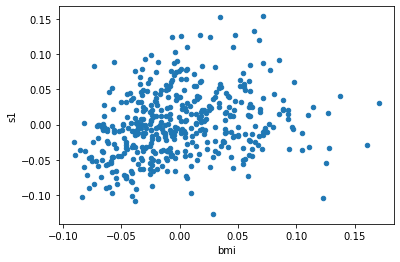

In [13]:
features_df.plot(kind="scatter",x="bmi",y="s1")

<AxesSubplot:ylabel='Frequency'>

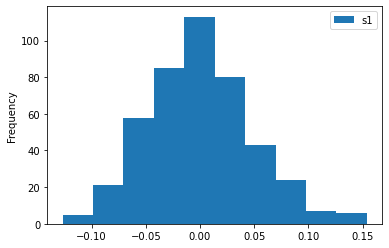

In [15]:
features_df.plot(kind="hist",x="bmi",y="s1")

<AxesSubplot:xlabel='age', ylabel='s3'>

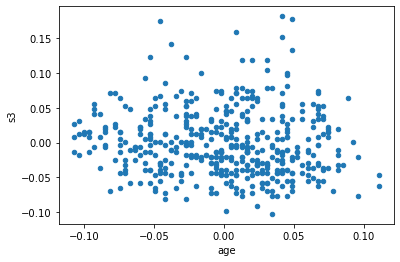

In [16]:
features_df.plot(kind="scatter",x="age",y="s3")

<AxesSubplot:xlabel='age', ylabel='s6'>

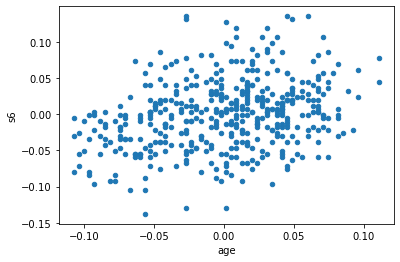

In [17]:
features_df.plot(kind="scatter",x="age",y="s6")

<AxesSubplot:ylabel='Frequency'>

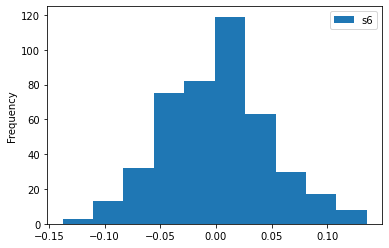

In [18]:
features_df.plot(kind="hist",x="age",y="s6")

### Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [19]:
features_df.corrwith(target_df)

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441484
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

In [20]:
a=features_df.corrwith(target_df)
a.max()

0.5864501344746886

the column is bmi

### Split the data into a training set and test set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=0)

In [69]:
reg = LinearRegression()

In [70]:
reg.fit(X_train, y_train)

LinearRegression()

In [71]:
reg.score(X_test, y_test)

0.33222203269065154

### Using this feature and target, perform linear regression with sklearn's LinearRegression

### Print the coefficients of the model

In [72]:
reg.coef_

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [73]:
reg.intercept_

152.5381335195406

### Plot the linear fit together with the training data

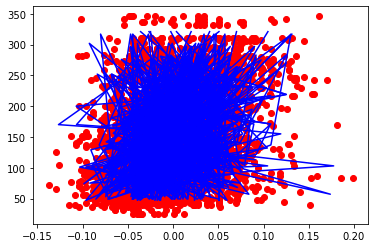

In [118]:
plt.plot(X_train,y_train,'ro',X_test,y_test,'b-');

The graph looks weird though I saw it in the ISLR book. Maybe I understand the question wrong. The code I use is from the course, I think it's a simple linear regression between two variables. If this question is about the regression between bmi and target_df, I did this one below. 

### Use the model to generate predictions on the test data and then compare against the actual target values by calculating the mean squared error and R-squared values.

In [119]:
ypred = reg.predict(X_test)

In [120]:
ypred

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

In [152]:
mean_squared_error(y_test, ypred)

3424.3166882137334

In [151]:
np.sqrt(mean_squared_error(y_test,ypred))

58.51766133582009

In [150]:
r2_score(y_test, ypred)

0.33222203269065154

### Try doing linear regression with other variables and/or multiple variables and comment on how each choice changes the mean squared error and R-squared values.

#### bmi with target_df

In [127]:
bmi = features_df[["bmi"]]

In [128]:
bmi

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [129]:
bmi_train, bmi_test, tar_train, tar_test = train_test_split(bmi, target_df, test_size=0.2, random_state=0)

In [130]:
reg.fit(bmi_train, tar_train)

LinearRegression()

In [131]:
reg.score(bmi_test, tar_test)

0.19057346847560164

In [132]:
reg.coef_

array([981.65543614])

In [133]:
reg.intercept_

152.28824927379625

so the fit model is y=152.29+0.19x

In [137]:
tar_pred = reg.predict(bmi_test)

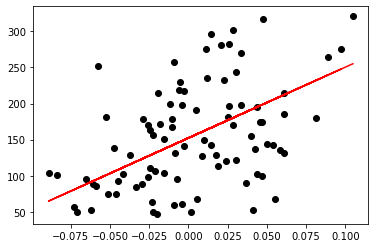

In [144]:
plt.scatter(bmi_test, tar_test, color="black")
plt.plot(bmi_test, tar_pred, color="red")

In [153]:
mean_squared_error(tar_test,tar_pred)

4150.680189329983

In [146]:
np.sqrt(mean_squared_error(tar_pred, tar_test))

64.4257727103834

In [148]:
r2_score(tar_test, tar_pred)

0.19057346847560164

We can see that as the most correlated feature, bmi and target_df has much lower R^2 than the whole features_df with the target_df, and much higher mean squared error. It means that bmi as a single variable is not enough to be the best fit and we can keep adding more variables to find better one. 

With this conclusion, I'm thinking to add another variable. It shows that s5 is the second highest correlated variable in features_df so I'll add this.

In [216]:
X = features_df[['bmi','s5']]  # I took the first two most related features
Y = target_df

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [225]:
reg.fit(X_train, Y_train)

LinearRegression()

In [226]:
reg.coef_

array([697.81363979, 623.00060413])

In [221]:
reg.intercept_

152.1334841628967

In [227]:
Y_pred = reg.predict(X_test)

In [228]:
mean_squared_error(Y_test,Y_pred)

3673.996921976782

In [229]:
r2_score(Y_test, Y_pred)

0.28353174666848313

R square is still not as high as the full dataset but it's much higher than only use bmi, so I think we can add s5 if we're making a multi linear regression model. If we want to increase even higher we can keep going.

### Try at least one other regression algorithm : Logistic Regression
I copy the practice in class with this diabete data


In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
logreg = LogisticRegression()

In [156]:
X = features_df[["bmi","s5"]]  # I took the first two most related features
Y = target_df

In [158]:
logreg.fit(X, Y)

LogisticRegression()

In [160]:
x_min = X["bmi"].min() - 1
x_max = X["bmi"].max() + 1
y_min = X["s5"].min() - 1
y_max = X["s5"].max() + 1

h = .02 

xarr = np.arange(x_min, x_max, h)
yarr = np.arange(y_min, y_max, h)

xx, yy = np.meshgrid(xarr, yarr)

In [161]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

/var/folders/8l/f3xq8byx6jx_ykv1p8vljth00000gn/T/ipykernel_64527/1451367699.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


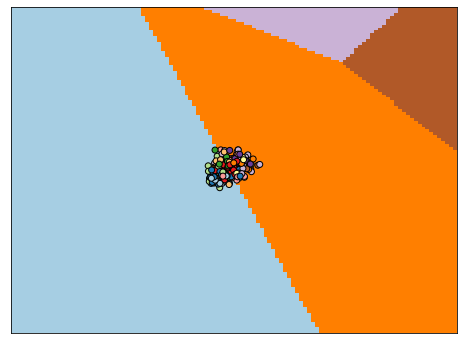

In [163]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X["bmi"], X["s5"], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Looks weird, might not be a good fit

# Step 3:  Clustering

### Use the following Python code to generate 4 artificial clusters of points in (x1,x2)-space

In [164]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['x1','x2'])

In [178]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

### Generate a scatter plot of the data to view the points

<AxesSubplot:xlabel='x1', ylabel='x2'>

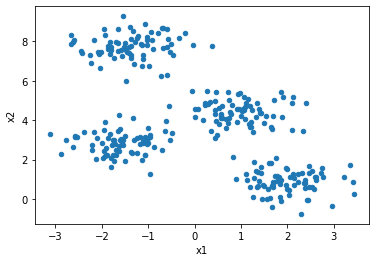

In [175]:
df.plot("x1","x2",kind="scatter")

### Use sklearn's KMeans to identify 4 clusters

In [177]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
import ipywidgets
import plotly.express as px
import pandas as pd

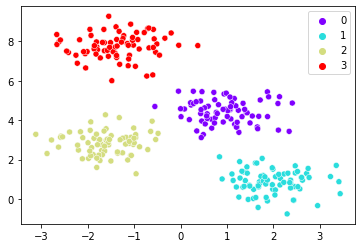

In [179]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='rainbow');

In [180]:
kmeans = KMeans(n_clusters=4)

In [181]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [182]:
kmeans.labels_

array([3, 0, 1, 0, 3, 3, 2, 1, 0, 0, 2, 0, 1, 0, 3, 1, 1, 3, 2, 2, 3, 3,
       1, 2, 2, 1, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 3, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 0, 1, 0, 2, 2, 2,
       0, 3, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 3, 1,
       0, 0, 1, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 3, 0, 3, 1, 3, 3, 1, 0, 1,
       2, 2, 3, 0, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2,
       2, 3, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       3, 2, 0, 2, 3, 1, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 1, 2, 0,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 3, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 1,
       0, 3, 3, 2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 2, 0, 2, 3, 1,
       3, 0, 0, 0, 0, 2, 2, 0, 1, 2, 3, 1, 2, 2, 2, 3, 3, 0, 1, 1, 2, 3,
       0, 2, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 3, 3, 1, 0, 2], d

### Generate another scatter plot of the data with the points colored by cluster to see how the algorithm fared

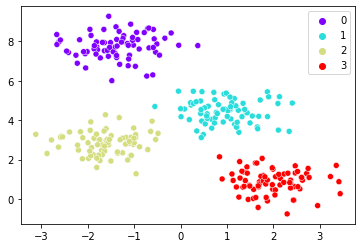

In [184]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans.labels_,
                palette='rainbow');

### Repeat with different parameter values in the call to KMeans, as well as for different parameters in the initial "blob"-formation with make_blobs, to see where KMeans does a good job and where it doesn't

#### Different parameter

In [185]:
kmeans3 = KMeans(n_clusters=3)

In [186]:
kmeans3.fit(X)

KMeans(n_clusters=3)

In [187]:
kmeans3.labels_

array([1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0], d

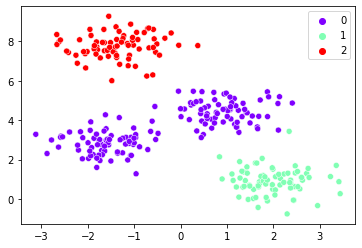

In [188]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans3.labels_,
                palette='rainbow');

Kmeans still works well. Not as accurate as 4. 

#### different blob

In [189]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)
df5 = pd.DataFrame(X, columns=['x1','x2'])

In [190]:
X

array([[ 9.93342581e+00, -1.55235644e+00],
       [-5.71099336e-01,  8.13306058e+00],
       [ 5.59529363e-01,  4.21400660e+00],
       [ 8.46449996e+00, -2.78811366e+00],
       [-1.23065895e+00,  2.84821990e+00],
       [-1.56387985e+00,  2.85349910e+00],
       [ 1.36155806e+00,  1.36638252e+00],
       [ 1.65991049e+00,  3.56289184e+00],
       [ 2.95195825e+00, -3.44327355e-01],
       [-1.07999075e+00,  7.23958585e+00],
       [ 9.14153059e+00, -2.98159160e+00],
       [ 8.50544171e+00, -2.68242835e+00],
       [ 1.87271752e+00,  4.18069237e+00],
       [-9.73806411e-01,  7.25669281e+00],
       [-1.27567815e+00,  7.96776461e+00],
       [ 7.89338559e-01,  4.33748653e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 2.03169783e+00,  1.96807561e-01],
       [ 9.40134324e+00, -3.05631382e+00],
       [-2.58043836e+00,  3.18844294e+00],
       [ 2.01432256e+00,  1.92566929e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 1.10123507e+00,  4.88977075e+00],
       [ 9.

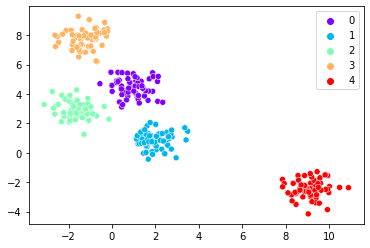

In [191]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='rainbow');

In [192]:
kmeans5 = KMeans(n_clusters=5)

In [193]:
kmeans5.fit(X)

KMeans(n_clusters=5)

In [194]:
kmeans5.labels_

array([1, 0, 4, 1, 3, 3, 2, 4, 2, 0, 1, 1, 4, 0, 0, 4, 4, 2, 1, 3, 2, 3,
       4, 1, 3, 4, 3, 2, 0, 3, 2, 1, 4, 1, 1, 0, 2, 0, 3, 2, 4, 3, 4, 4,
       1, 3, 2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 2, 0, 0, 1, 3, 2, 3, 0, 0, 1,
       1, 0, 3, 1, 3, 2, 1, 1, 1, 1, 1, 0, 4, 2, 0, 0, 4, 1, 1, 0, 2, 2,
       2, 3, 0, 2, 2, 1, 3, 0, 4, 0, 0, 4, 1, 3, 2, 0, 2, 4, 3, 2, 4, 3,
       4, 0, 3, 2, 1, 2, 4, 1, 3, 2, 4, 0, 1, 0, 1, 3, 3, 2, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 1, 3, 4, 3, 4, 3, 0, 4, 1, 0, 1, 4,
       1, 4, 3, 0, 1, 0, 3, 4, 0, 4, 4, 3, 4, 1, 0, 4, 2, 2, 4, 1, 2, 4,
       0, 0, 3, 2, 4, 3, 2, 4, 3, 0, 2, 4, 4, 4, 3, 1, 4, 0, 4, 4, 0, 3,
       0, 2, 3, 1, 4, 0, 2, 0, 4, 1, 3, 0, 2, 1, 2, 3, 4, 4, 0, 3, 3, 3,
       2, 4, 1, 2, 2, 3, 3, 0, 4, 0, 0, 4, 4, 1, 4, 3, 3, 4, 1, 2, 0, 1,
       0, 2, 4, 2, 1, 1, 0, 1, 0, 0, 0, 2, 3, 2, 2, 3, 0, 2, 2, 1, 4, 4,
       0, 2, 0, 0, 4, 1, 4, 3, 2, 0, 3, 4, 2, 2, 2, 4, 1, 1, 2, 2, 4, 3,
       2, 3, 0, 0, 1, 2, 3, 3, 1, 1, 1, 3, 2, 4], d

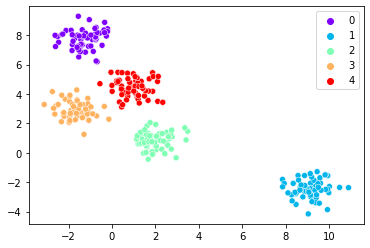

In [195]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans5.labels_,
                palette='rainbow');

Obviously if I change center parameter the cluster number also change

I'll try with deviation

In [200]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.20, random_state=0)
df2 = pd.DataFrame(X, columns=['x1','x2'])

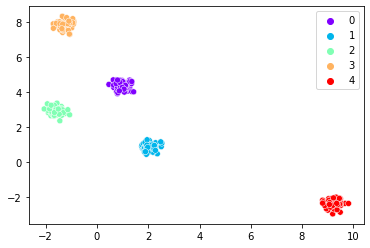

In [201]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='rainbow');

In [202]:
kmeans2 = KMeans(n_clusters=5)

In [203]:
kmeans2.fit(X)

KMeans(n_clusters=5)

In [204]:
kmeans2.labels_

array([1, 2, 4, 1, 0, 0, 3, 4, 3, 2, 1, 1, 4, 2, 2, 4, 4, 3, 1, 0, 3, 0,
       4, 1, 0, 4, 0, 3, 2, 0, 3, 1, 4, 1, 1, 2, 3, 2, 0, 3, 4, 0, 4, 4,
       1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 2, 2, 1, 0, 3, 0, 2, 2, 1,
       1, 2, 0, 1, 0, 3, 1, 1, 1, 1, 1, 2, 4, 3, 2, 2, 4, 1, 1, 2, 3, 3,
       3, 0, 2, 3, 3, 1, 0, 2, 4, 2, 2, 4, 1, 0, 3, 2, 3, 4, 0, 3, 4, 0,
       4, 2, 0, 3, 1, 3, 4, 1, 0, 3, 4, 2, 1, 2, 1, 0, 0, 3, 3, 2, 3, 2,
       1, 2, 2, 3, 1, 1, 0, 1, 4, 1, 1, 0, 4, 0, 4, 0, 2, 4, 1, 2, 1, 4,
       1, 4, 0, 2, 1, 2, 0, 4, 2, 4, 4, 0, 4, 1, 2, 4, 3, 3, 4, 1, 3, 4,
       2, 2, 0, 3, 4, 0, 3, 4, 0, 2, 3, 4, 4, 4, 0, 1, 4, 2, 4, 4, 2, 0,
       2, 3, 0, 1, 4, 2, 3, 2, 4, 1, 0, 2, 3, 1, 3, 0, 4, 4, 2, 0, 0, 0,
       3, 4, 1, 3, 3, 0, 0, 2, 4, 2, 2, 4, 4, 1, 4, 0, 0, 4, 1, 3, 2, 1,
       2, 3, 4, 3, 1, 1, 2, 1, 2, 2, 2, 3, 0, 3, 3, 0, 2, 3, 3, 1, 4, 4,
       2, 3, 2, 2, 4, 1, 4, 0, 3, 2, 0, 4, 3, 3, 3, 4, 1, 1, 3, 3, 4, 0,
       3, 0, 2, 2, 1, 3, 0, 0, 1, 1, 1, 0, 3, 4], d

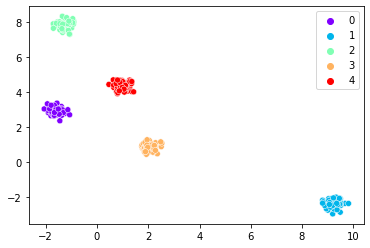

In [205]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans2.labels_,
                palette='rainbow');

The std is pretty low so the number is highly clustered. Here KNN works very good. So I adjust the std higher and get more random one.

In [209]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.90, random_state=40)
df9 = pd.DataFrame(X, columns=['x1','x2'])

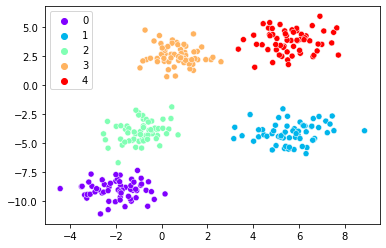

In [210]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='rainbow');

In [211]:
kmeans9 = KMeans(n_clusters=5)

In [212]:
kmeans9.fit(X)

KMeans(n_clusters=5)

In [214]:
kmeans9.labels_

array([3, 1, 0, 4, 0, 3, 4, 4, 2, 3, 4, 2, 2, 1, 2, 4, 2, 0, 1, 2, 3, 0,
       4, 4, 1, 2, 1, 1, 3, 1, 2, 0, 0, 1, 4, 3, 2, 1, 3, 1, 3, 1, 3, 4,
       2, 4, 4, 3, 3, 4, 4, 2, 1, 1, 4, 4, 2, 2, 4, 1, 3, 3, 0, 4, 2, 0,
       4, 4, 3, 2, 0, 4, 1, 1, 2, 3, 2, 2, 2, 2, 3, 0, 0, 4, 2, 1, 0, 0,
       3, 1, 3, 0, 3, 3, 1, 1, 1, 3, 2, 3, 4, 0, 2, 3, 0, 3, 0, 1, 1, 1,
       2, 1, 3, 1, 3, 0, 1, 2, 0, 3, 0, 0, 0, 0, 4, 1, 0, 4, 1, 2, 3, 0,
       2, 2, 2, 4, 0, 2, 4, 0, 3, 4, 1, 0, 1, 4, 2, 2, 4, 3, 3, 1, 1, 2,
       3, 4, 2, 1, 0, 3, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 4, 0, 4,
       0, 3, 4, 3, 0, 0, 2, 4, 0, 3, 1, 4, 0, 3, 4, 3, 1, 1, 3, 2, 2, 1,
       3, 4, 2, 3, 4, 0, 4, 3, 4, 3, 2, 0, 0, 4, 0, 3, 1, 2, 0, 0, 4, 3,
       0, 2, 4, 2, 4, 4, 3, 2, 1, 2, 3, 4, 1, 1, 4, 1, 4, 0, 0, 0, 1, 1,
       3, 2, 1, 1, 2, 1, 1, 4, 2, 4, 2, 3, 4, 4, 1, 1, 4, 0, 4, 1, 3, 3,
       4, 2, 3, 2, 1, 3, 4, 4, 0, 4, 3, 3, 3, 2, 0, 2, 0, 3, 0, 4, 1, 2,
       0, 4, 0, 3, 2, 3, 0, 2, 3, 4, 1, 2, 0, 1], d

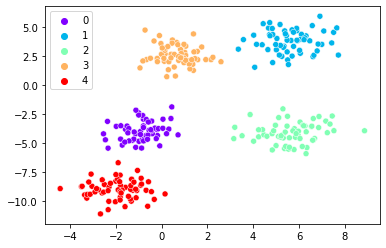

In [215]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans9.labels_,
                palette='rainbow');

It's still working well, a few mistakes though.